**Prediction Quesiton**: Were Asian Americans more likely to be attacked in cities/towns with a higher amount of Covid cases due to rise in xenophobia during the Pandemic?

**Importance for client**: This research question can guide law enforcement in the future. Even though there may not be the same case of anti-asian hate, there will most likely be more xenophobia in the future. By analyzing this data, we can see if there was actually a rise during the pandemic of attacks on asian americans, and then law enforcement can protect groups in a similar scenario in the future.

**Setting Up Data:**

In [1]:
# Setting up environment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading in dataset as dataframe:
df = pd.read_csv("cleaned_df.csv")
print(df.shape)

# previewing the data:
# df.head(5)
df.columns

(13794, 21)


Index(['Unnamed: 0', 'State', 'Agency', 'Source', 'Solved', 'Year', 'Month',
       'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic',
       'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'VicCount', 'OffCount'],
      dtype='object')

In [3]:
# selecting relevant columns to use for model analysis:
df_new = df[['Year', 'Month', 'State', 'OffRace', 'OffAge', 'Situation', 'VicRace']]
# df_new.head(5)

In [4]:
# checking for NaNs:
print(df_new.isna().sum())

# dropping missing values for 'OffRace' since can not impute for categorical:
# df_new = df_new.dropna(subset=['OffRace'], axis=0)
df_new['OffRace'] = df_new["OffRace"].fillna('Unknown')


# imputing missing values for 'OffAge' with median:
df_new['OffAge'] = df_new['OffAge'].fillna(df_new['OffAge'].median())

# imputing missing values for 'VicRace' with 'Unknown':
df_new['VicRace'] = df_new['VicRace'].fillna('Unknown')

# previewing new/cleaned dataframe:
print(df_new.head())
print(df_new.isna().sum())

Year            0
Month           0
State           0
OffRace      4413
OffAge       4441
Situation       0
VicRace       210
dtype: int64
   Year    Month   State                            OffRace  OffAge  \
0  2016  January  Alaska  American Indian or Alaskan Native    21.0   
1  2016  January  Alaska                              White    15.0   
2  2016  January  Alaska                              White    15.0   
3  2016  January  Alaska                              White    34.0   
4  2016  January  Alaska  American Indian or Alaskan Native    33.0   

                          Situation                            VicRace  
0     Single victim/single offender  American Indian or Alaskan Native  
1  Multiple victims/single offender                              White  
2  Multiple victims/single offender                              White  
3  Single victim/multiple offenders  American Indian or Alaskan Native  
4     Single victim/single offender  American Indian or Alaskan Nativ

<ipython-input-4-85c2b3cfffdf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['OffRace'] = df_new["OffRace"].fillna('Unknown')
<ipython-input-4-85c2b3cfffdf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['OffAge'] = df_new['OffAge'].fillna(df_new['OffAge'].median())
<ipython-input-4-85c2b3cfffdf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

**One Hot Encoding Data for Model:**

In [5]:
# separating numerical and categorical columns:

# numerical columns:
num_cols = df_new.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

# categorical columns:
cat_cols = df_new.select_dtypes(exclude=[np.number]).columns.tolist()
# cat_cols.remove('VicRace')
print(cat_cols)

['Year', 'OffAge']
['Month', 'State', 'OffRace', 'Situation', 'VicRace']


In [11]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
#splitting the data to before and after 2020
df_pre_covid = df_new[df_new['Year']<2020]
df_post_covid = df_new[df_new['Year']>=2020]

y_pre = df_pre_covid['VicRace']
y_post = df_post_covid['VicRace']

X_raw_pre = df_pre_covid.drop(columns=['VicRace'])
X_raw_post = df_post_covid.drop(columns=['VicRace'])

# # one hot encoding categorical features:
X_pre = pd.get_dummies(X_raw_pre, drop_first=True)
X_post = pd.get_dummies(X_raw_post, drop_first = True)



# splitting data into test/train:
X_train_pre, X_test_pre, Y_train_pre, Y_test_pre = train_test_split(X_pre, y_pre, test_size=0.2, random_state=42)
X_train_post, X_test_post, Y_train_post, Y_test_post = train_test_split(X_post, y_post, test_size=0.2, random_state=42)

##Training the PRE COVID MODEL

Best min_sample_leaf value: 24 with Accuracy of 0.741


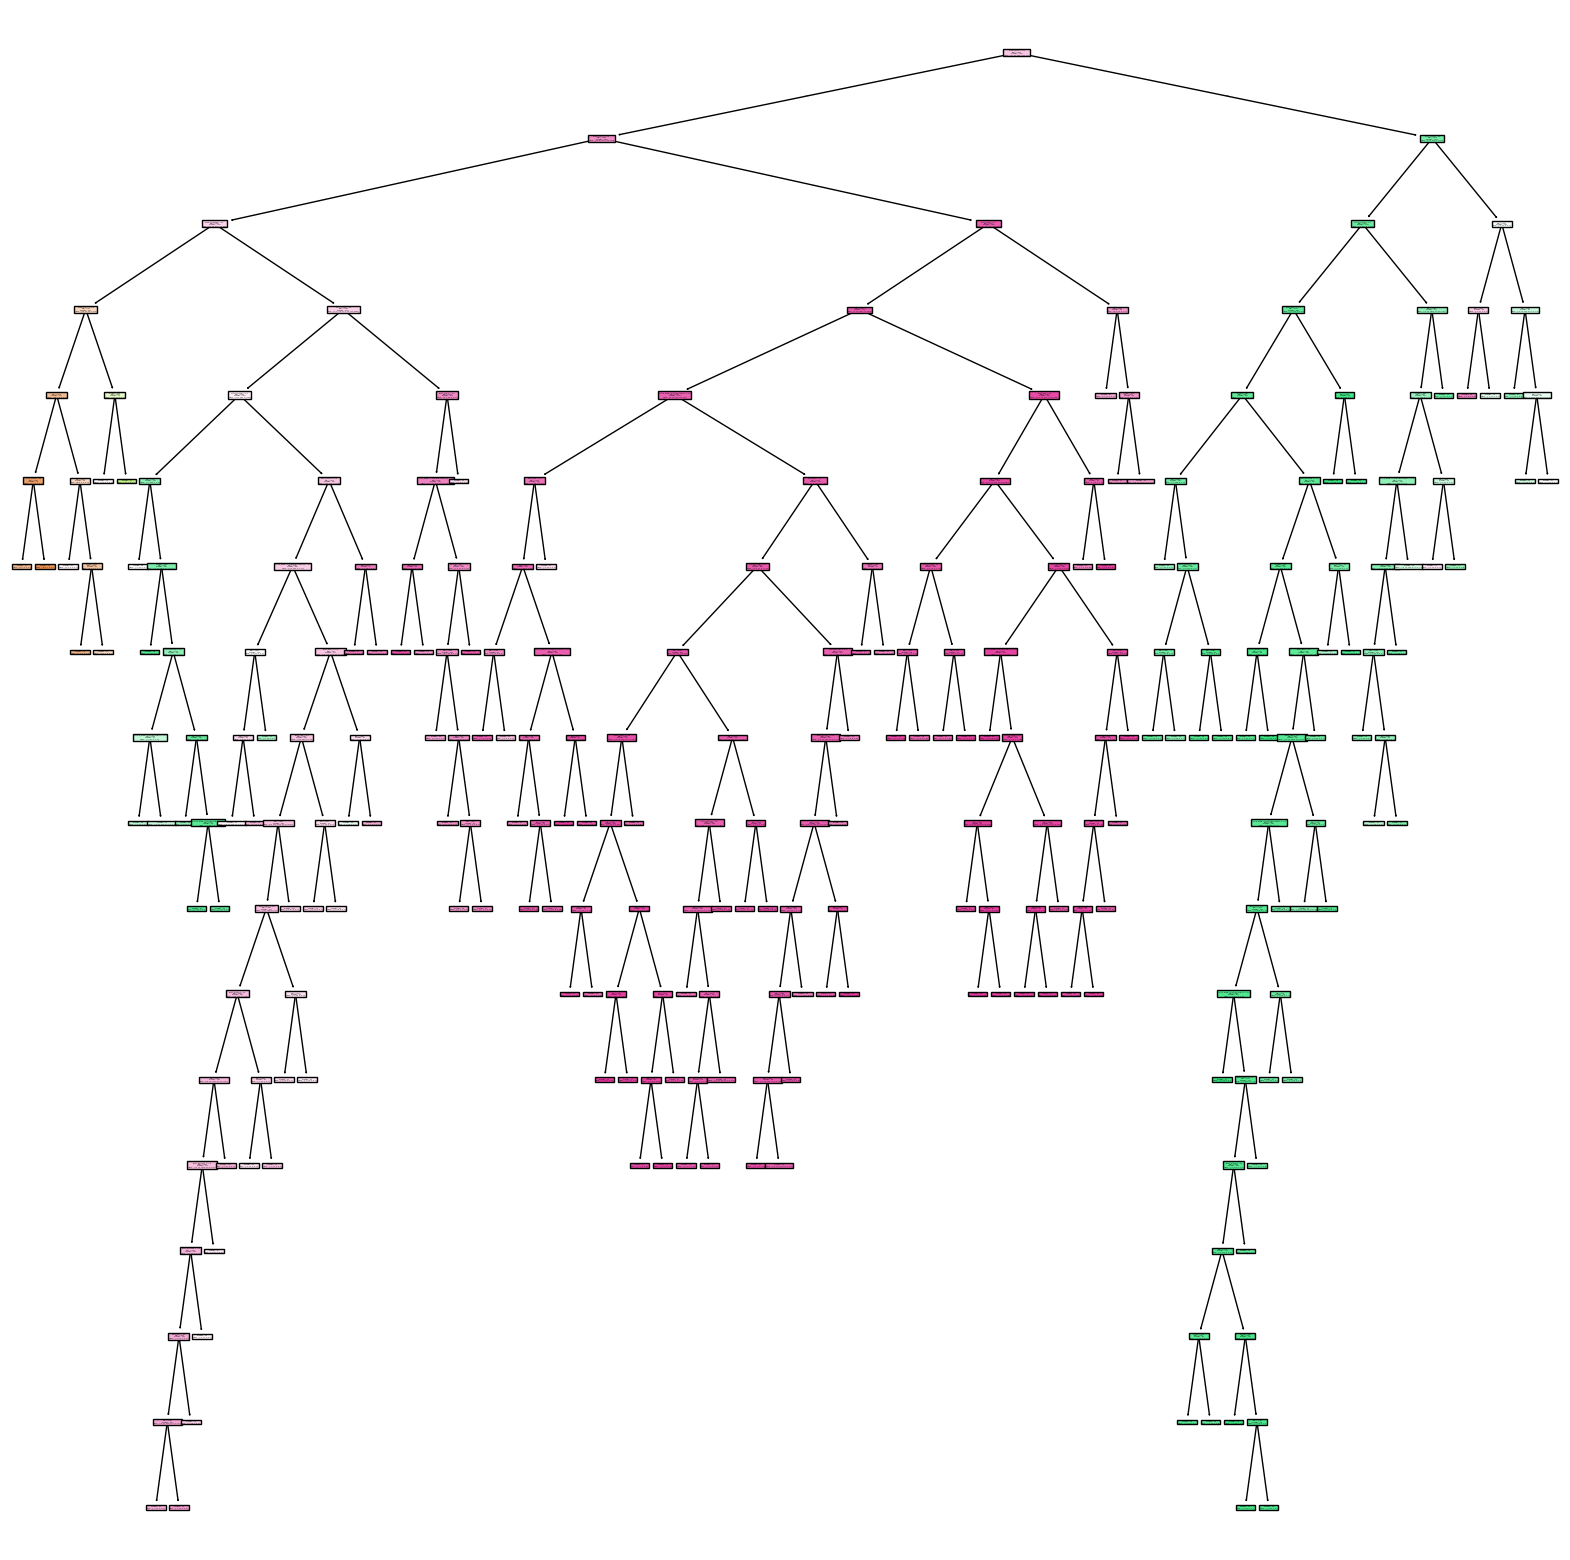

In [12]:
# importing all necessary libraries:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(min_samples_leaf=500, random_state=42)
model.fit(X_train_pre, Y_train_pre)
y_hat = model.predict(X_test_pre)

from sklearn.metrics import accuracy_score

acc_list = []
leaf_values = list(range(1, 26))

for leaf in leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train_pre, Y_train_pre)
    y_hat = model.predict(X_test_pre)
    acc = accuracy_score(Y_test_pre, y_hat)
    acc_list.append(acc)

best_leaf = leaf_values[acc_list.index(max(acc_list))]
best_acc = max(acc_list)

print(f'Best min_sample_leaf value: {best_leaf} with Accuracy of {best_acc:.3f}')

plt.figure(figsize=(20, 20))
plot_tree(model, filled=True, feature_names=model.feature_names_in_)
plt.show()


In [16]:
for i in range(10):
    print(f"Predicted: {y_hat[i]} | Actual: {Y_test_pre.iloc[i]}")

Predicted: Black | Actual: Black
Predicted: White | Actual: White
Predicted: Black | Actual: White
Predicted: White | Actual: Black
Predicted: White | Actual: Unknown
Predicted: White | Actual: White
Predicted: White | Actual: White
Predicted: Black | Actual: White
Predicted: Black | Actual: Black
Predicted: White | Actual: White


In [17]:
results_df = X_test_pre.copy()
results_df['Actual'] = Y_test_pre
results_df['Predicted'] = y_hat

# View mismatches
mismatches = results_df[results_df['Actual'] != results_df['Predicted']]
print(mismatches.head())

       Year  OffAge  Month_August  Month_December  Month_February  \
12115  2017    21.0         False           False           False   
9922   2016    17.0         False            True           False   
10057  2016    32.0         False           False           False   
5385   2018    31.0         False           False           False   
6161   2017    25.0         False           False            True   

       Month_January  Month_July  Month_June  Month_March  Month_May  ...  \
12115          False       False       False        False      False  ...   
9922           False       False       False        False      False  ...   
10057          False       False       False        False       True  ...   
5385           False        True       False        False      False  ...   
6161           False       False       False        False      False  ...   

       OffRace_Native Hawaiian or Pacific Islander  OffRace_Unknown  \
12115                                        False 

##Training the Post Covid Model

Best min_sample_leaf value: 12 with Accuracy of 0.747


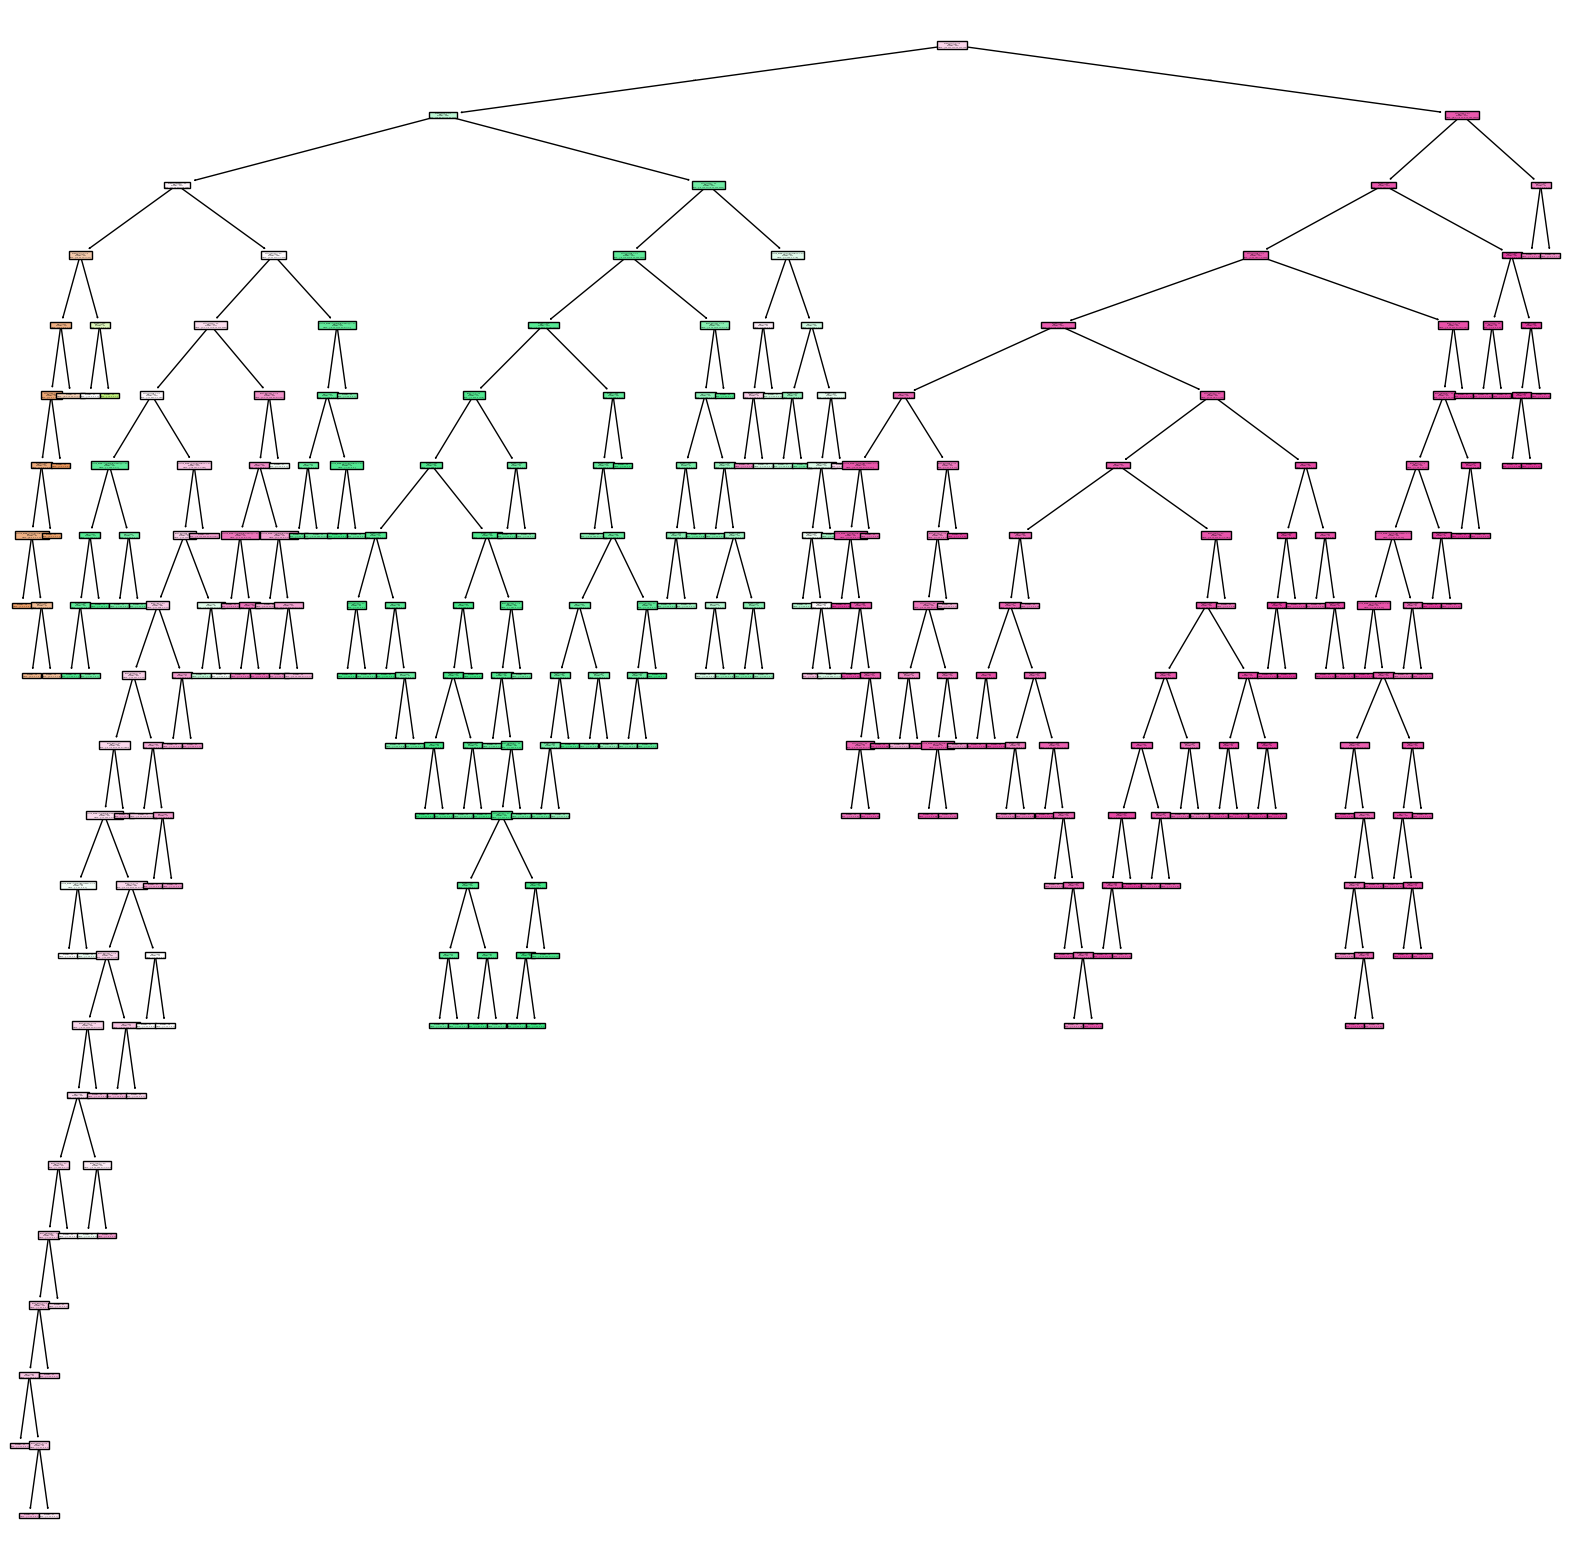

In [18]:
# importing all necessary libraries:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

model_post = DecisionTreeClassifier(min_samples_leaf=500, random_state=42)
model_post.fit(X_train_post, Y_train_post)
y_hat_post = model_post.predict(X_test_post)

from sklearn.metrics import accuracy_score

acc_list_post = []
leaf_values = list(range(1, 26))

for leaf in leaf_values:
    model_post = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    model_post.fit(X_train_post, Y_train_post)
    y_hat_post = model_post.predict(X_test_post)
    acc_post = accuracy_score(Y_test_post, y_hat_post)
    acc_list_post.append(acc_post)

best_leaf_post = leaf_values[acc_list_post.index(max(acc_list_post))]
best_acc_post = max(acc_list_post)

print(f'Best min_sample_leaf value: {best_leaf_post} with Accuracy of {best_acc_post:.3f}')

plt.figure(figsize=(20, 20))
plot_tree(model_post, filled=True, feature_names=model_post.feature_names_in_)
plt.show()


In [19]:
for i in range(10):
    print(f"Predicted: {y_hat_post[i]} | Actual: {Y_test_post.iloc[i]}")

Predicted: Black | Actual: Black
Predicted: Black | Actual: White
Predicted: White | Actual: White
Predicted: American Indian or Alaskan Native | Actual: American Indian or Alaskan Native
Predicted: White | Actual: Black
Predicted: White | Actual: White
Predicted: White | Actual: Unknown
Predicted: White | Actual: American Indian or Alaskan Native
Predicted: White | Actual: Black
Predicted: White | Actual: White


In [20]:
results_df_post = X_test_post.copy()
results_df_post['Actual'] = Y_test_post
results_df_post['Predicted'] = y_hat_post

# View mismatches
mismatches_post = results_df_post[results_df_post['Actual'] != results_df_post['Predicted']]
print(mismatches_post.head())

       Year  OffAge  Month_August  Month_December  Month_February  \
5454   2020    30.0         False           False           False   
3951   2020    23.0         False           False           False   
12744  2023    20.0         False           False            True   
7330   2023    36.0         False           False           False   
12464  2021    30.0         False           False           False   

       Month_January  Month_July  Month_June  Month_March  Month_May  ...  \
5454           False       False       False         True      False  ...   
3951           False       False       False        False      False  ...   
12744          False       False       False        False      False  ...   
7330           False       False       False        False      False  ...   
12464          False       False       False        False      False  ...   

       OffRace_Native Hawaiian or Pacific Islander  OffRace_Unknown  \
5454                                         False 